# Hypothesis Testing - Determine the Null and Alternative Hypothesis

### Exercise 1

**Scenario**: FashionFiesta is an online clothing store that sells apparel for men, women, and children. They recently made changes to their website's layout in an attempt to increase the average purchase amount. They conducted an A/B test where half of their visitors saw the old layout (Group A) and the other half saw the new layout (Group B).

**Solution**:

**Null Hypothesis**: The new layout did not perform better than the old layout

**Alternative Hypothesis**: The new layout had a higher average purchase amount than the old layout

### Exercise 2

**Scenario**: :
Previously, FashionFiesta offered direct discounts to its customers. However, this year, they've changed their voucher mechanism to a ladder voucher system to potentially boost sales. A ladder voucher system means that as customers spend more, they earn incrementally higher discounts. For instance, spend 50 dollars, earn a 5% discount, spend 100 dollars and get a 10% discount, and so on. The goal is to incentivize higher spending. Before introducing the ladder voucher, the average number of items per transaction was 3.

**Solution**:

**Null Hypothesis**: The average number of items purchased per transaction after introducing the ladder voucher system is equal to 3.

**Alternative Hypothesis**: The average number of items purchased per transaction after introducing the ladder voucher system is not equal to 3.

### Exercise 3

**Scenario**: FashionFiesta has redesigned its checkout page to simplify the process and reduce the number of steps. The company aims to reduce the cart abandonment rate with this new design. Before the redesign, the cart abandonment rate was 20%.

**Solution**:

**Null Hypothesis**: The cart abandonment rate with the new checkout design is 20% (or more).

**Alternative Hypothesis**: The cart abandonment rate with the new checkout design is less than 20%.

# Build a P-value interpreter function with ChatGPT

In [ ]:
# Function to interpret the p-value
def interpret_p_value(p_value, alpha=0.05):
    """
    Interprets the significance of a given p-value.

    Parameters:
    - p_value (float): The p-value to interpret.
    - alpha (float): The significance level, default is 0.05.

    Returns:
    - str: Interpretation of the p-value.
    """

    if p_value < alpha:
        return f"The p-value is {p_value:.3f}. This is less than the significance level of {alpha}. Therefore, we reject the null hypothesis."
    else:
        return f"The p-value is {p_value:.3f}. This is greater than or equal to the significance level of {alpha}. Therefore, we fail to reject the null hypothesis."

# Example usage:
p_val = 0.03
print(interpret_p_value(p_val))


The p-value is 0.030. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.


# Two-Sample T-Test

FashionFiesta recently launched two new lines of footwear: "Urban Trend" and "Classic Elegance". They want to determine if the average sales (in units) of these two lines are significantly different over a month.

In [ ]:
# Average sales for each lines of footwear
urban_trend = [45, 50, 48, 52, 49, 47, 50, 51, 46, 49, 52, 50, 49, 48, 47, 51, 50, 49, 52, 48, 47, 46, 49, 50, 48, 51, 52, 49, 47, 50]
classic_elegance = [40, 42, 43, 41, 44, 42, 45, 43, 44, 42, 41, 40, 43, 44, 42, 41, 43, 44, 42, 45, 44, 41, 43, 44, 45, 43, 42, 44, 43, 41]

In [ ]:
# Get to know your data
import numpy as np

# Calculate and print the mean for 'urban_trend'
print(f"The Mean for Urban Trend is {np.mean(urban_trend)}")

# Calculate and print the mean for 'classic_elegance'
print(f"The Mean for Classic Elegance is {np.mean(classic_elegance)}")

The Mean for Urban Trend is 49.06666666666667
The Mean for Classic Elegance is 42.7


In [ ]:
# Import library
import scipy.stats as stats

In [ ]:
# Perform Levene's Test to assess if the variances of 'urban_trend' and 'classic_elegance' are equal
levene_stat, levene_p = stats.levene(urban_trend, classic_elegance)

# Print the p-value of Levene's Test
print(f"Levene's Test p-value: {levene_p:.4f}")

Levene's Test p-value: 0.1667


**Null Hypothesis (H0)**: The variances of the two samples ("Urban Trend" and "Classic Elegance") are equal.

**Alternative Hypothesis (H1)**: The variances of the two samples are not equal.

In [ ]:
# Apply the function to interpret the p-value with a significance level of 0.05
print(interpret_p_value(levene_p, alpha=0.05))

The p-value is 0.167. This is greater than or equal to the significance level of 0.05. Therefore, we fail to reject the null hypothesis.


**Null Hypothesis (H0)**: The average sales (in units) of the "Urban Trend" line is equal to the average sales of the "Classic Elegance" line over a month.

**Alternative Hypothesis (H1)**: The average sales (in units) of the "Urban Trend" line is not equal to the average sales of the "Classic Elegance" line over a month.

In [ ]:
# 2-sample t-test
# Perform a 2-sample t-test to compare the means of 'urban_trend' and 'classic_elegance'
t_stat, t_p = stats.ttest_ind(urban_trend,
                              classic_elegance,
                              alternative='two-sided',
                              equal_var=False)  # False - indicates that we are not assuming equal variances

# Print the p-value of the 2-sample t-test
print(f"2-sample t-test p-value: {t_p:.3f}")

# Apply the function to interpret the p-value with a significance level of 0.05
print(interpret_p_value(t_p, alpha=0.05))

2-sample t-test p-value: 0.000
The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.


# One-Tailed Test

FashionFiesta has decided to implement a new marketing strategy exclusively for its "Urban Trend" footwear line. The strategy involves targeted online ads and influencer partnerships. They hope this will increase the average daily sales of the "Urban Trend" line compared to the "Classic Elegance" line. Before the new marketing strategy, both lines had roughly similar daily sales.

**Null Hypothesis (H0)**: The average daily sales of the "Urban Trend" line (after the new marketing strategy) are less than or equal to the average daily sales of the "Classic Elegance" line.

**Alternative Hypothesis (H1)**: The average daily sales of the "Urban Trend" line (after the new marketing strategy) are greater than the average daily sales of the "Classic Elegance" line.

In [ ]:
# Average sales for each lines of footwear after new marketing strategy
urban_trend_sales = [55, 56, 60, 59, 54, 58, 57, 59, 56, 55, 58, 59, 60, 57, 56, 60, 59, 58, 57, 60, 59, 58, 56, 57, 60, 59, 56, 57, 60, 59]
classic_elegance_sales = [50, 49, 52, 51, 50, 49, 50, 52, 49, 50, 52, 51, 50, 50, 49, 52, 51, 50, 50, 52, 51, 50, 49, 50, 52, 51, 50, 50, 52, 51]

In [ ]:
# Calculate the mean daily sales
mean_urban_trend = np.mean(urban_trend_sales)
mean_classic_elegance = np.mean(classic_elegance_sales)

print(f"Mean daily sales of Urban Trend: {mean_urban_trend:.2f}")
print(f"Mean daily sales of Classic Elegance: {mean_classic_elegance:.2f}")

Mean daily sales of Urban Trend: 57.80
Mean daily sales of Classic Elegance: 50.50


In [ ]:
# One-tailed two-sample t-test
# Perform a one-tailed t-test to determine if the mean sales of 'Urban Trend' is significantly greater than 'Classic Elegance'
t_stat, t_p = stats.ttest_ind(urban_trend_sales,
                              classic_elegance_sales,
                              alternative='greater')

# Print the p-value of the one-tailed t-test
print(f"Two-sample t-test p-value (one-tailed): {t_p:.4f}")

Two-sample t-test p-value (one-tailed): 0.0000


In [ ]:
# Apply the function to interpret the p-value with a significance level of 0.05
print(interpret_p_value(t_p, alpha=0.05))

The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.


# Chi-square test

FashionFiesta conducted a survey asking customers about their preferred style of footwear from two new lines: "Urban Trend" and "Classic Elegance". They also asked customers about their age group: "Young (18-30)" or "Mature (31-50)". The company wants to determine if there's a relationship between age group and style preference.

**Null Hypothesis (H0)**: Age group and style preference are independent of each other.

**Alternative Hypothesis (H1)**: Age group and style preference are not independent of each other.

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define observed frequencies for each category
# 'Urban Trend' and 'Classic Elegance' are the columns
# 'Young (18-30)' and 'Mature (31-50)' are the row index labels
data = {'Urban Trend': [120, 70], 'Classic Elegance': [80, 130]}
index_labels = ['Young (18-30)', 'Mature (31-50)']

# Create a DataFrame
df = pd.DataFrame(data, index=index_labels)

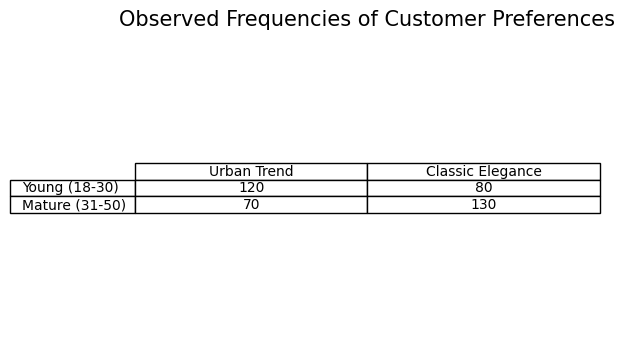

In [ ]:
# Plotting the table
fig, ax = plt.subplots(figsize=(6, 4)) # set the size that you'd like (width, height)
ax.axis('off') # Turn off the axis

# Create a table and add it to the plot
tbl = ax.table(cellText=df.values,
               colLabels=df.columns,
               rowLabels=df.index,
               loc='center',
               cellLoc = 'center')

plt.title("Observed Frequencies of Customer Preferences", fontsize=15)
plt.show()

In [ ]:
# Chi-square test
chi2_stat, p_val, _, expected_frequencies = stats.chi2_contingency(df.values)

# Print the p-value from the chi-square test
print(f"p-value: {p_val:.4f}")

# Print the expected frequencies calculated by the chi-square test
print(f"Expected Frequencies:\n{expected_frequencies}")

p-value: 0.0000
Expected Frequencies:
[[ 95. 105.]
 [ 95. 105.]]


In [ ]:
# Apply the function to interpret the p-value with a significance level of 0.05
print(interpret_p_value(p_val, alpha=0.05))

The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.
